# 07.  MCMC 진단 및 샘플링 및 다봉 분포

<br>

## 07-01. MCMC 진단

- 일반적으로 MCMC 체인이 수렴했다고 증명하는 것은 불가능하지만, 수렴하지 않은 경우를 감지할 수 있는 여러 진단 방법들이 개발

- 수렴 외에도, 샘플의 효율성(efficiency)도 매우 중요한 관심사
    
    - 왜냐하면 샘플링의 효율성은 크게 달라질 수 있으며, MCMC의 모든 이론적 보장이 점근적(asymptotic)이라는 점을 고려하면, 효율성은 결과가 얼마나 유용할지를 결정하는 데 큰 영향을 미칠 수 있음
    
<br>


### 01. 수렴 진단

- **간단히 말해, MCMC의 수렴 여부를 확인하는 방법은 넓게 분산된 시작점에서 $m$개의 체인을 시작하고, 이들이 결국 유사한 결과를 산출하는지를 검사하는 것**
    
    이때 결과의 유사성은 일반적으로 잠재적 스케일 축소(Potential Scale Reduction Factor), 
    
    또는 $\hat{R}$으로 측정 


- $\hat{R}$은 시뮬레이션을 무한대로 계속했을 때 현재 분포의 스케일이 얼마나 축소될 수 있는지를 나타내는 척도(Gelman et al., 2013)
    - $\hat{R}$은 처음 Gelman과 Rubin (1992)에 의해 도입되었으며, 이후 여러 방법으로 보완
    - **$\hat{R}$의 추정은 체인 내 분산 $𝑊$와 체인 간 분산 $B$를 기반으로 함**
    

- $\theta_{i,j}$가 $j$번째 체인에서, $n$개의 샘플 중 $i$번째 샘플일 때,
    - **체인별 평균 : $\theta_{: j} = \frac{1}{n} \sum_{i=1}^n \theta_{ij}$**
    
        **전체 평균 : $\theta_{::} = \frac{1}{m} \sum_{j=1}^m \theta_{: j}$**
        
        **체인간 분산 : $B = \frac{n}{m-1} \sum_{j=1}^m (\theta_{: j} - \theta_{::})^2$**
    
    - **각 체인의 분산 : $s_j^2 = \frac{1}{n-1} \sum_{i=1}^n (\theta_{ij} - \theta_{: j})^2.$**
        
        **체인 내 분산 : $W = \frac{1}{m} \sum_{j=1}^m s_j^2$**

    
    $\rightarrow$ **$\theta$의 분산은$$\operatorname{Var}(\theta) = \frac{n-1}{n} W + \frac{1}{n} B.$$**
    
    **Gelman et al. (2013)에 따라** $\hat{R}$은 $$\hat{R} = \sqrt{\frac{\mathrm{Var}(\theta)}{W}}.$$

- $\hat{R}$은 스칼라 변수에 대해 정의되며, 벡터 변수의 경우, 각 성분별로 $\hat{R}$을 계산한 후, 그 중 최대값을 취하는 것이 일반적
- **$\hat{R}$은 $n$이 증가함에 따라 1에 가까워지며, 일반적으로 $\hat{R} < 1.1$이면 체인이 수렴했다고 간주**
- **원래 전체 체인에 대한 $\hat{R}$을 계산하였으나,**
    
    **체인이 비정상 (non-stationary) 상태인 경우를 놓치는 문제를 보완하기 위하여,**
    
    **현재는 체인을 두 개로 나누어, 각각을 독립된 체인으로 간주하여 $\hat{R}$을 계산하는 방법 (split-$\hat{R}$)이 최선의 실무 관행으로 사용**

<br>

### 02. 샘플링 효율성의 진단
- **MCMC 샘플러의 효율성은 일반적으로 샘플들의 자기상관(autocorrelation)을 이용해 평가**
    - 자기상관은 주어진 $lag\;k$ 이후 인접한 샘플들 간의 상관관계를 측정하는 지표
- **자기상관을 사용하는 이유는, 효율적인 샘플러는 본질적으로 상관 없는(독립적인) 샘플들을 생성하는 반면,** 
    
    **아주 작은 스텝만을 이동하는 비효율적인 샘플러의 경우 인접한 샘플들이 매우 높은 상관관계를 보이기 때문**
        
    $\rightarrow$ 이렇게 상관성이 높은 샘플들은 대상 분포에 대한 정보를 제공하는 데 덜 효과적

- 자기상관은 **효과적 샘플 크기(Effective Sample Size, ESS)** 라는 지표로 간편하게 요약할 수 있으며,
    
    **ESS는 주어진 샘플이 독립적인 샘플 몇 개에 해당하는지를 나타내는 척도로, 높은 ESS 값은 보다 효율적인 샘플러를 의미**

<br>

- 정상성을 가지는 순열 $(\theta_1, \theta_2, \dots)$에서 $k$시차에 대한 자기상관 (autocorrelation) $\rho_k$는 다음과 같이 정의

$$\begin{equation}
  \rho_k = \frac{E[(\theta_i - \mu)(\theta_{i+k} - \mu)]}{\sigma^2}, \quad k = 0, 1, 2, \dots,
\end{equation}$$

- $E[⋅]$는 시간 인덱스 $i$에 대해 적용되며, $μ$는 순열의 평균, $σ^2$는 분산

- 이러한 자기상관들을 고려할 때, $M$개의 샘플에 대한 효과적 샘플 크기(Effective Sample Size, ESS)는 다음과 같이 정의

$$\begin{equation}
  \mathrm{ESS} = \frac{M}{1 + 2 \sum_{k=1}^{\infty} \rho_k}.
\end{equation}$$

- 모든 $k>0$에 대해 $\rho_k=0$인 독립적인(uncorrelated) 샘플의 경우에는 $ESS=M$이 되며, 
    
    반대로 샘플들이 매우 높은 상관관계를 가지면 ESS는 매우 작아짐

- 위의 식들은 보기에는 간단해 보이지만, 실제로 적용할 때는 어려움이 따름. 
    
    **특히 긴 $lag\;k$에 대한 $\rho_k$의 추정은 신뢰할 수 없는 경우가 많음**
    
- **평균 $μ$와 분산 $σ^2$ 의 부정확한 추정은 종종 $ρ_k$에 대해,**
    
    **큰 음수값으로의 추정을 초래하여, 그 결과 ESS가 비합리적으로 크게 추정될 수 있음**

    $\rightarrow$ Geyer (1992)가 제안한 한 가지 방법은 길이가 $n$인 시퀀스 $\theta_1, \dots, \theta_n$로부터 자기상관을 추정할 때, 
    
    **실제로 $\rho_k$의 합이 $n-k$개의 항만을 포함하지만, $1/n$을 사용하는 방법을 추천**
    
    $\rightarrow$ 이는 큰 $k$에 해당하는 항들을 0으로 효과적으로 축소시켜 주며, 그 결과 추정식은 다음과 같음
    
$$\begin{equation}
  \hat{\rho}_k = \frac{1}{n \sigma^2} \sum_{i=1}^{n-k} (\theta_i - \mu)(\theta_{i+k} - \mu), \quad k = 0, 1, 2, \dots.
\end{equation}$$

<br>

- $\rho_k$ 추정으로 인한 문제를 피하기 위해  (Gelman et al. (2013))는 

$$\begin{equation}
  \mathrm{ESS} = \frac{M}{1 + 2 \sum_{k=1}^{\infty} \rho_k}.
\end{equation}$$식의 분모에 있는 합계를 잘라내 (truncate)  사용하는 방법을 제안
- 쌍 $\rho_{2k} + \rho_{2k+1}$의 합은 양수임이 알려져 있는데, 이를 이용해 $\rho_k$ 추정값이 너무 불안정해지는 시점을 감지할 수 있음

    - 구체적으로 $\rho_{K+1} + \rho_{K+2}$가 음수가 되는 첫 번째 양의 홀수 $K$를 상한으로 설정
    
    $\rightarrow$ $M$개의 샘플에 대한 효과적 샘플 크기(ESS)의 계산은 다음과 같이 단순화
    
$$\begin{equation}
  \widehat{\mathrm{ESS}} = \frac{M}{1 + 2 \sum_{k=1}^{K} \rho_k},
\end{equation}$$

- 여기서 $K$는 위에서 정의된 대로

$$K = \min \{ j \mid j = 2l+1, l \in \mathbb{N}, \rho_{j+1} + \rho_{j+2} < 0 \}$$

<br>

## 07-02. 좋은 MCMC 샘플링
- **여러 체인을 사용한 수렴 확인**: 서로 매우 다른 시작점에서 3개 이상의 체인을 실행하면, 
    체인들이 수렴했는지 확인

- **Warm-up/Burn-in 단계의 샘플 폐기**: 초기 Warm-up 또는 Burn-in 기간(예: 전체 샘플의 첫 50% 등)의 샘플은 초기점에 지나치게 의존하므로 분석에서 제외

- **제안 분포의 튜닝**: 빠른 혼합(fast mixing)을 위해 제안 분포(proposal)를 적절히 조정
    - 튜닝은 먼저 수행한 후, 튜닝 과정에서 얻은 샘플들을 모두 폐기하고 실제 분석을 진행
    - 또한, Warm-up 단계와 정상 상태(stationary) 단계에서 최적의 튜닝 설정이 다를 수 있음을 유의
    
- **수렴 진단 도구 사용**: 예를 들어, $\hat{R}$(잠재적 스케일 축소 인자) 통계량을 사용하여 각 체인의 결과를 비교함으로써 수렴 여부를 평가

- **최종 분석을 위한 샘플 혼합**:  Warm-up 단계 이후의 모든 체인에서 얻은 샘플들을 혼합하여 최종 분석에 사용

- **추론 결과의 검증**: 최종 추론 결과를 더 단순한 모델이나 근사 결과와 비교하여 검증

<br>

## 07-03. MCMC 수렴 개선

<br>

### 01. 고차원 분포에 대한 블로킹 (Blocking)

- **고차원 분포에서 발생하는 문제점: 차원이 증가하면 제안 분포의 수용 확률은 자연스럽게 낮아짐**
    - 예) 하나의 제안값이 수용될 확률이 $p$인 경우, $d$개의 독립적인 제안이 모두 수용될 확률은 $p^d$가 되어 매우 작아짐
    
    $\rightarrow$ 해결책 - **블로킹: 파라미터들을 여러 개의 부분 집합(블록)으로 나눈 후, 각 블록을 차례대로 업데이트하는 방법**을 사용
    
    (블로킹(blocking)은 MCMC 샘플링에서 파라미터의 차원이 높을 때, 전체 파라미터 벡터를 한 번에 업데이트하는 대신, 파라미터들을 여러 그룹(블록)으로 나누고 각 블록을 개별적으로 또는 순차적으로 업데이트하는 기법)
    
    - **각 블록에 대해 제안이 합리적이면, 전체적으로 수렴하는 샘플링이 구축**

<br>

- Gibbs 샘플링:  Gibbs 샘플링은 각 변수를 하나씩 업데이트하는 극단적인 블로킹 기법
    - 각 변수의 조건부 사후분포에서 제안을 받으면 100% 수용되는 특성이 있어, 효율적으로 업데이트할 수 있음
    

####  블로킹은 수용 확률을 높이는 데 도움이 되지만, 서로 다른 블록 간의 변수들이 강하게 상관되어 있으면 샘플링 효율성이 떨어질 수 있음

<br>

#### 02. 다봉분포를 위한 MCMC의 병렬 템퍼링 (Parallel Tempering, 재가열)
- 다봉 분포에서 MCMC의 성공적인 샘플링은 일반적으로 서로 양립하기 어려운 타겟인, 
    
    소규모의 국소적인 탐색값과 서로 다른 봉우리들 간의 큰 전역 이동을 결합해야 함

- 병렬 템퍼링 방법은 다봉 분포에서 MCMC 수렴을 크게 가속할 수 있음
- **이 방법의 기본 아이디어는 여러 개의 MCMC 체인을 병렬로 실행하는 것**
    
    - 각 체인은 서로 다른 온도에서 실행되며, 
        
        “뜨거운(hot)” 체인의 타겟 분포를 평활화하여 탐색을 쉽게 만듬
    - 또한, 체인 간에 상태를 교환(swap)하는 새로운 이동(move)이 도입
        
        이를 통해, 뜨거운 체인에서 빠른 탐색으로 얻은 결과를 실제 목표 분포를 샘플링하는 가장 차가운(cold) 체인으로 전달

- 단일 타겟 분포 $\pi(\theta)$를 샘플링하는 대신, $0\leq \beta \leq 1$의 범위에 대해 $\pi(\theta)^\beta$를 샘플링
    
    - 물리학의 유사한 개념에서 $\beta$는 $\frac{1}{T}$로 해석
    
        이 방식은 $\beta=1$일 때, 실제 목표 분포에서부터 $\beta=0$일 때 균등분포로 부드럽게 전환할 수 있게 해줌
        
    - 베이지언 모델의 경우, 템퍼링은 종종 가능도항에만 적용되며, 이 경우 타겟은  


$$\pi_{\beta}(\theta) = p(\theta) p(\mathcal{D} | \theta)^\beta.$$

- 온도값의 집합 $B = (\beta_1=1, \dots, \beta_b=0)$이 주어졌을 때, $\Theta = (\theta^{(1)}, \dots, \theta^{(b)})$상에서, 
    
    다음과 같이 확장된 시스템을 정의
    
    $$\pi(\Theta) = \prod_{i=1}^b \pi_{\beta_i}(\theta^{(i)}).$$

- 블로킹 접근법을 따르면서, 순차적으로 제안값이 수락/거부되는 절차
    1. 각 $\pi_{\beta_i}(\theta(i))$에 대해 MH 제안 수행
    2. 이웃 체인들의 상태를 교환하는 제안을 수행
    
    - 체인 ($i, i+1$)의 상태를 교환하는 제안을 고려할 때, 이 이동의 수용확률은
    
$$a = \frac{\pi_{\beta_i}(\theta^{(i+1)}) \pi_{\beta_{i+1}}(\theta^{(i)})}
	{\pi_{\beta_i}(\theta^{(i)}) \pi_{\beta_{i+1}}(\theta^{(i+1)})}.$$

<br>

### 03. 병렬 템퍼링 예시
- 다봉 타겟분포에 대한 병렬 템퍼링
    
    타겟분포 :
    
$$\pi(\theta) = \exp(-\gamma(\theta^2 - 1)^2).$$

- 이 타겟분포는 명백하게 $\theta = \pm 1$에서 두 개의 봉우리를 가지고 있으며,
     
     봉우리 사이의 깊이는 매개변수 $\gamma$에 의해 제어
     
     - 예) $\gamma=64$ : 봉우리간 거리가 매우 큼 $\rightarrow$ 표준 MH 샘플링 적용은 어려움

In [38]:
import scipy.integrate
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [39]:
def mhsample1(theta0, n, logtarget, drawproposal):
    theta = theta0
    thetas = np.zeros(n)
    accepts = 0
    
    for i in range(n):
        theta_prop = drawproposal(theta)
        if np.log(npr.rand()) < logtarget(theta_prop) - logtarget(theta):
            theta = theta_prop
            accepts += 1
            
        thetas[i] = theta
        
    print("Sampler acceptance rate:", accepts/n)
    return thetas

In [40]:
def ltarget(theta, gamma):
    return -gamma*(theta**2-1)**2

In [41]:
Z = scipy.integrate.quad(lambda theta: np.exp(ltarget(theta, 64.0)), -2, 2)
 
npr.seed(42)
theta = mhsample1(1.0, 10000, lambda theta: ltarget(theta, 64.0),
              lambda theta: theta + 0.1*npr.normal())

Sampler acceptance rate: 0.473


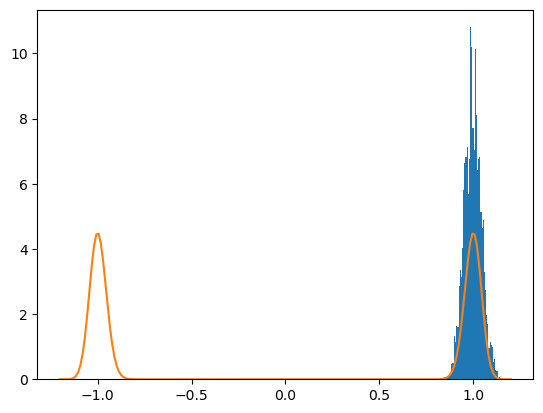

In [42]:
theta = theta[len(theta)//2:]
h = plt.hist(theta, 50, density=True)
t = np.linspace(-1.2, 1.2, 200)
plt.plot(t, np.exp(ltarget(t, 64.0)) / Z[0])
plt.show()

In [43]:
print(np.mean(theta))

0.996830738176979


<br>

#### $[10^{-3}, 1]$범위에서 로그 스케일로 간격을 둔 $\beta$값을 사용하는 5개의 체인

In [44]:
betas = np.logspace(-3, 0, 5)
print(betas)

[0.001      0.00562341 0.03162278 0.17782794 1.        ]


- 최적의 $\beta$값은 모든 인접한 값들 사이에서 상태 교환 (swap)이 균일하게 수용되어야 함
    - 0근처에서 더 좁은 간격을 두어 달성

In [45]:
def ltarget(theta, gamma):
    return -gamma*(theta**2-1)**2

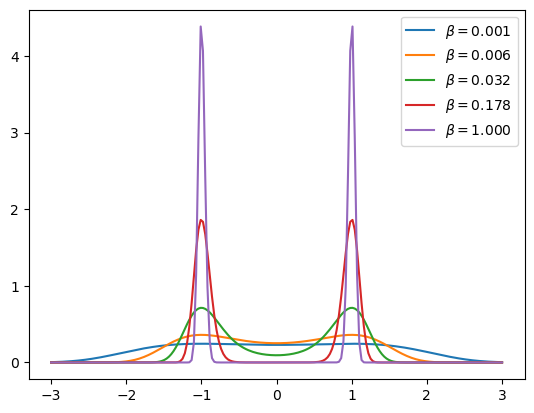

In [46]:
t = np.linspace(-3, 3, 200)
for b in betas:
    Z = scipy.integrate.quad(lambda theta: np.exp(b * ltarget(theta, 64.0)), -4, 4)
    plt.plot(t, np.exp(b * ltarget(t, 64.0)) / Z[0], label=r"""$\beta = %.3f$""" % b)

plt.legend()
plt.show()

<br>

#### 각 $\beta$에 대해 샘플링을 하여, 좋은 수용률을 달성
- $\beta$에 대한 제안분포 (정규분포) 

$$q_\beta(\theta';\; \theta) = \mathcal{N}(\theta';\; \theta, \sigma_{\text{prop}, \beta}^2)$$

$$\sigma_{\text{prop}, \beta}^2 = \frac{1}{\beta} 0.1^2,$$

In [47]:
def pt_target(theta, beta, gamma):
    return beta * ltarget(theta, gamma)

In [48]:
def pt_msample(theta0, n, betas, target, drawproposal):
    CHAINS = len(betas)
    accepts = np.zeros(CHAINS)
    swapaccepts = np.zeros(CHAINS-1)
    swaps = np.zeros(CHAINS-1)
    
    """모든 변수는 모든 체인에 대해 복제됨"""
    theta = theta0 * np.ones(CHAINS)
    lp = np.zeros(CHAINS)
    thetas = np.zeros((n, CHAINS))
    for j in range(CHAINS):
        lp[j] = target(theta[j], betas[j])
        
    for i in range(n):
        
        """모든 체인에 대해 독립적인 MH"""
        for j in range(CHAINS):
            theta_prop = drawproposal(theta[j], betas[j])
            l_prop = target(theta_prop, betas[j])
            if np.log(npr.rand()) < l_prop - lp[j]:
                theta[j] = theta_prop
                lp[j] = l_prop
                accepts[j] += 1
        
        """두 개의 체인에 대한 스왑"""
        j = npr.randint(CHAINS-1)
        h = target(theta[j+1],betas[j])+target(theta[j],betas[j+1]) - lp[j] - lp[j+1]
        swaps[j] += 1
        if np.log(npr.rand()) < h:
            # Swap theta[j] and theta[j+1]
            temp = theta[j]
            theta[j] = theta[j+1]
            theta[j+1] = temp
            lp[j] = target(theta[j], betas[j])
            lp[j+1] = target(theta[j+1], betas[j+1])
            swapaccepts[j] += 1
        thetas[i,:] = theta
        
    print('Acceptance rates:', accepts/n)
    print('Swap acceptance rates:', swapaccepts/swaps)
    return thetas

In [49]:
npr.seed(42)
betas = np.logspace(-3, 0, 5)
theta = pt_msample(1.0, 10000, betas,
                   lambda theta, beta: pt_target(theta, beta, 64.0),
                   lambda theta, beta: theta + 0.1/np.sqrt(beta)*npr.normal())

Acceptance rates: [0.4698 0.637  0.5694 0.4845 0.4563]
Swap acceptance rates: [0.74561404 0.63706096 0.4660707  0.4945184 ]


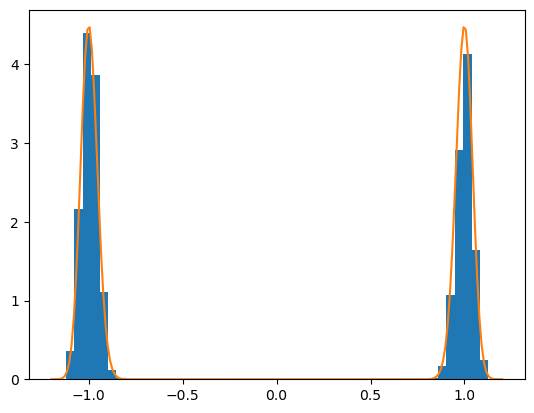

In [50]:
theta = theta[len(theta)//2:]
h = plt.hist(theta[:,-1], 50, density=True)
t = np.linspace(-1.2, 1.2, 200)
plt.plot(t, np.exp(ltarget(t, 64.0)) / Z[0])
plt.show()

In [51]:
print(np.mean(theta[:,-1]))

-0.08167086471587666


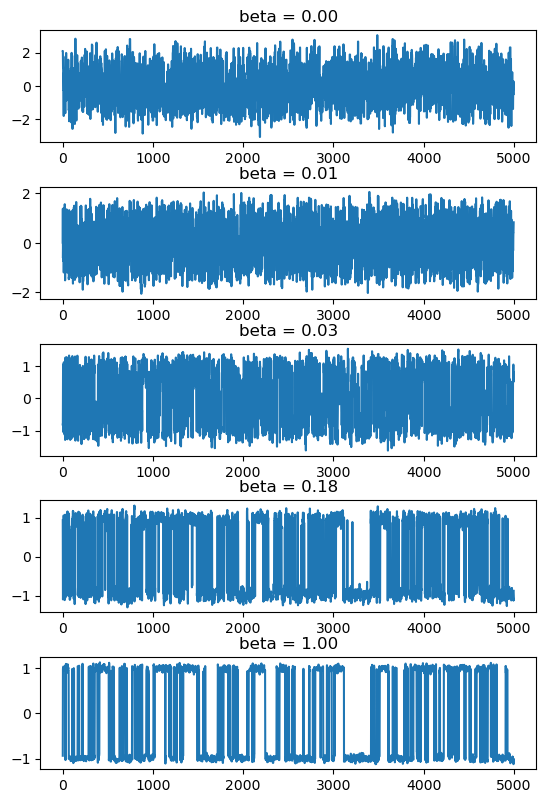

In [52]:
N = len(betas)
fix, ax = plt.subplots(N, 1, figsize=[6.4, 9.6])
for i in range(N):
    ax[i].set_title('beta = %.2f' % betas[i])
    ax[i].plot(theta[:,i])
    plt.subplots_adjust(hspace=0.4)
plt.show()